In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from src.download_roads_data import get_roads_from_osmnx
from src.s2_grid import split_polygon

In [2]:
pictures = gpd.read_file("../data/S2_GRID.geojson")
noise = gpd.read_file("../data/NOISE.geojson")
transport_lines = gpd.read_file("../data/TRANSPORT_LINES.geojson")
noise_barriers_1 = gpd.read_file('../data/NOISE_BARRIERS.geojson')
noise_barriers_2 = gpd.read_file('../data/NOISE_BARRIERS_2.geojson')
noise_barriers_1.drop(columns='ID_CLONA', inplace=True)
noise_barriers_2.drop(columns='ID_VAL', inplace=True)
noise_barriers = pd.concat([noise_barriers_1, noise_barriers_2]).reset_index(drop = True)
parks = gpd.read_file('../data/PARKS.geojson')
buildings = gpd.read_file('../data/BUILDINGS.geojson')
population = gpd.read_file('../data/DEMOGRAPHY.geojson')
roads = get_roads_from_osmnx()


noise_bounds = noise.unary_union

transport_lines = gpd.clip(transport_lines, noise_bounds)
roads = gpd.clip(roads, noise_bounds)
noise_barriers = gpd.clip(noise_barriers, noise_bounds)

## Przykładowe wykresy

In [4]:
noise_bounds_gdf = gpd.GeoDataFrame(geometry=[noise_bounds], crs = population.crs)

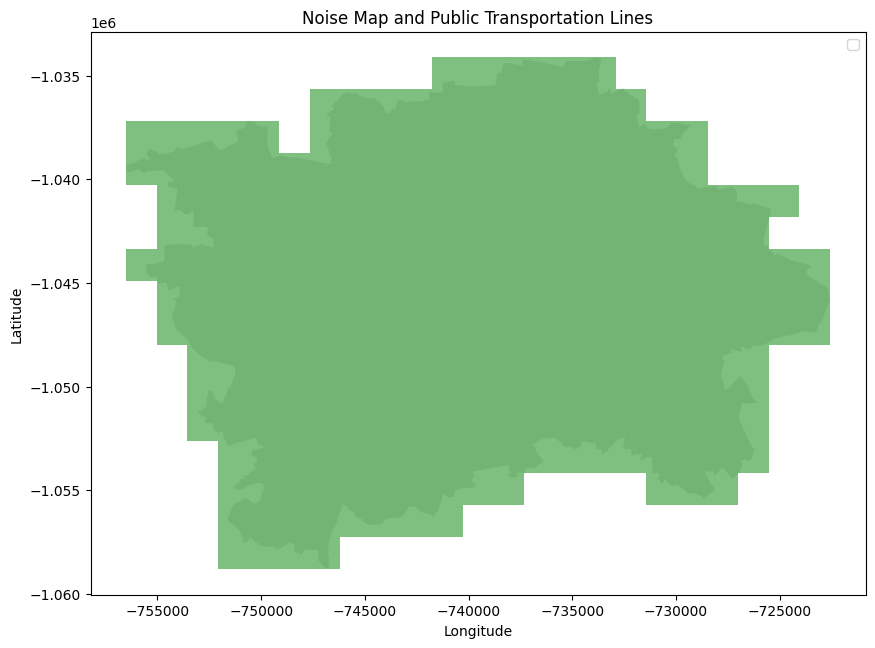

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the noise map
#noise.plot(ax=ax, color="lightgray", edgecolor="black", label="Noise Map")
noise_bounds_gdf.plot(ax=ax, alpha = 0.5, color="lightgray")

# Plot the public transportation lines
pictures.plot(ax=ax, alpha = 0.5, color="green")

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()